In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import matplotlib as mpl


from collections import defaultdict
from copy import deepcopy
from tqdm import tqdm
from pathlib import Path
import random
import json
from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="darkgrid")

import collections

In [2]:
def get_qtype_freq(df):
  q_list = df['question'].values.tolist()
  q_type = ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how'] #, 'name', 'whose', 
  
  q_freq = {}
  for ques in q_list:
    q_tokens = ques.lower().split()
    for typ in q_type:
      if typ in q_tokens[0]:
        q_freq.setdefault(typ, []).append(ques)

  freq_qtype = [len(x) for x in list(q_freq.values())]
  print(freq_qtype, sum(freq_qtype))
  
  df_sorted = pd.DataFrame()
  
  df_sorted['QTYPE'] = list(q_freq.keys())
  df_sorted['QFREQ'] = freq_qtype
  df_sorted['n'] = freq_qtype
  df_sorted = df_sorted.sort_values("QFREQ", ascending=False)

  print(df_sorted.shape)
  
  return df_sorted

In [3]:
def find_question_type(df):
  q_list = df['question'].values.tolist()
  q_type = ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how'] #, 'name', 'whose', 
  k=0
  qtyp_ls = []
  ques_ls = []
  for ques in q_list:
    k+=1
    q_tokens = ques.lower().split()
    for typ in q_type:
      if typ in q_tokens[0]:
        qtyp_ls.append(typ)
        ques_ls.append(ques)
      elif typ not in q_tokens[0]:
        qtyp_ls.append('Others')
        ques_ls.append(ques)
        
  assert len(qtyp_ls) == len(ques_ls)
  print(len(qtyp_ls), k)
  
  return qtyp_ls, ques_ls

In [4]:
def get_qtype(ques):
  q_type = ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how', 'name'] #, 'name', 'whose', 
  
  q_tokens = ques.lower().split()
  for typ in q_type:
    if typ in q_tokens[0]:
      return typ[0].upper()+typ[1:]
  return 'Others'


In [5]:
path = '/net/kdinxidk03/opt/NFS/75y/data/qa/dataset_pos/otquad/otquad.json'
cache_path = '/net/kdinxidk03/opt/NFS/75y/data/OTMRC_PAPER/cached_dev_bert_384_test_otquad'

features_and_dataset = torch.load(cache_path)
features, dataset, examples = (
                              features_and_dataset["features"],
                              features_and_dataset["dataset"],
                              features_and_dataset["examples"],
                              )

# print(len(examples))

# qid_ls = []
# ques_ls = []
# for x in examples:
#   qid  = x.__dict__['qas_id']
#   ques = x.__dict__['question_text']
#   qid_ls.append(qid)
#   ques_ls.append(ques)

In [6]:
# examples[0].__dict__

In [7]:
answer_dict = {}
token_dict = {}
for ex in examples:
  answer_dict[ex.__dict__['qas_id']] = ex.__dict__['answers'][0]['text']

In [8]:
k=0
title_dict = []
for ex in examples:
  k+=1
  title_dict.append((ex.__dict__['qas_id'],
                     ex.__dict__['title']))
k

1097

In [9]:
# x = [ex.__dict__['qas_id'] for ex in examples]

# for k,v in collections.Counter(x).items():
#   if v==2:
#     print(k)

In [10]:
title_dict = dict(title_dict)

In [11]:
len(list(title_dict.keys()))

1097

In [12]:
df_title = pd.DataFrame()
df_title['QID'] = list(title_dict.keys())
print(df_title.shape)
df_title['title_old'] = list(title_dict.values())
df_title['Answer'] = df_title['QID'].map(answer_dict)

(1097, 1)


In [13]:
df_title

,QID,title_old,Answer
0,0,Pain Management Opioid Taper Decision Tool,assist Primary Care providers in determining i...
1,1,Pain Management Opioid Taper Decision Tool,Establish treatment goals
2,2,Pain Management Opioid Taper Decision Tool,plan
3,3,Pain Management Opioid Taper Decision Tool,if there is clinically meaningful improvement ...
4,4,Pain Management Opioid Taper Decision Tool,"risks, benefits and responsibilities for manag..."
...,...,...,...
1092,1092,About this Clinical Practice Guideline: Shared...,"a patient-centered interview, and exploration ..."
1093,1093,About this Clinical Practice Guideline: Clinic...,There are electronic tools
1094,1094,About this Clinical Practice Guideline: Clinic...,the Opioid Therapy Risk Report (OTRR) and the ...
1095,1095,About this Clinical Practice Guideline: Clinic...,allows VA providers to review clinical data re...


In [14]:
new_title = {'Discussion of Recommendations: Risk Mitigation: Recommendation':'Recommendations',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Written Informed Consent and Opioid Treatment Agreements \n':'Recommendations',
 'Discussion of Recommendations: Opioid Therapy for Acute Pain: Discussion':'Recommendations',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Prescribing of Naloxone Rescue and Accompanying Education':'Recommendations',
 'Discussion of Recommendations: Opioid Therapy for Acute Pain: Recommendation':'Recommendations',
 'Recommendations':'Recommendations',
 'About this Clinical Practice Guideline: Shared Decision Making': 'Specifications',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendation \n':'Recommendations',
 'Introduction' : 'Introduction',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Other Risk Mitigation Strategies':'Recommendations',
 'Paradigm Shift in Pain and Its Treatment':'Background',
 'Discussion of Recommendations: Type, Dose, Duration, Follow-up, and Taper of Opioids: Recommendations':'Recommendations',
 'Epidemiology and Impact: General Population':'Background',
 'Discussion of Recommendations: Risk Mitigation: Discussion':'Recommendations',
 'About this Clinical Practice Guideline: Methods': 'Specifications',
 'Opioid Epidemic':'Background',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Discussion \n':'Recommendations',
 'Module C: Tapering or Discontinuation of Opioid Therapy': 'Algorithm',
 'Discussion of Recommendations: Type, Dose, Duration, Follow-up, and Taper of Opioids: Discussion':'Recommendations',
 'Discussion of Recommendations: Risk Mitigation: Discussion: State Prescription Drug Monitoring Programs':'Recommendations',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendations \n':'Recommendations',
 'How to Use This Clinical Practice Guideline': 'Introduction',
 'Chronic Pain and Co-occurring Conditions ':'Background',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Patients at High Risk for Opioid Use Disorder':'Recommendations',
 'Module A: Determination of Appropriateness for Opioid Therapy': 'Algorithm',
 'Risk Factors for Adverse Outcomes of Opioid Therapy ':'Background',
 'Taxonomy':'Background',
 'About this Clinical Practice Guideline': 'Specifications',
 'About this Clinical Practice Guideline: Patient-centered Care': 'Specifications',
 'Pain Management Opioid Taper Decision Tool': 'Specifications',
 'Prioritizing Safe Opioid Prescribing Practices and Use ':'Background',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Discussion':'Recommendations',
 'Significant Risk Factors':'Background',
 'About this Clinical Practice Guideline: Clinical Decision Support Tools': 'Specifications',
 'Qualifying Statements':'Introduction',
 'Module D: Patients Currently on Opioid Therapy': 'Algorithm',
 'Mental health disorders':'Background',
 'Discussion of Recommendations: Risk Mitigation: Discussion: Urine Drug Testing and Confirmatory Testing':'Recommendations',
 'Discussion of Recommendations: Initiation and Continuation of Opioids: Recommendation':'Recommendations',
 'About this Clinical Practice Guideline: Scope of this Clinical Practice Guideline': 'Specifications',
 'Algorithm': 'Algorithm',
 'Module B: Treatment with Opioid Therapy': 'Algorithm',
 'About this Clinical Practice Guideline: Highlighted Features of this Clinical Practice Guideline': 'Specifications',
 'Epidemiology and Impact: VA/DoD Population ': 'Background'}


In [15]:
df_title['TITLE'] = df_title['title_old'].map(new_title)
df_title['TITLE'].value_counts().sum()

1097

In [16]:
df = pd.DataFrame()
df['question'] = [ex.__dict__['question_text'] for ex in examples]
df['id'] = [ex.__dict__['qas_id'] for ex in examples]

In [17]:
df['qtype'] = df['question'].apply(get_qtype)

In [18]:
df.qtype.value_counts()

What      578
Others    174
When       92
How        76
Which      70
Who        61
Why        28
Where      14
Name        4
Name: qtype, dtype: int64

In [19]:
question_others = df[df['qtype']=='Others']['question'].values.tolist()
question_define = df[df['qtype']!='Others']['question'].values.tolist()
ids_others      = df[df['qtype']=='Others']['id'].values.tolist()
ids_define      = df[df['qtype']!='Others']['id'].values.tolist()
qtyp_define     = df[df['qtype']!='Others']['qtype'].values.tolist()

remainder_ques = []
remainder_qtyp = []
remainder_id   = []

for i, x in enumerate(question_others):
  if 'what' in x.lower():
    if x not in question_define:
      remainder_ques.append(x)
      remainder_qtyp.append('What')
      remainder_id.append(ids_others[i])

In [20]:
len(remainder_ques), len(remainder_qtyp), len(remainder_id)

(84, 84, 84)

In [33]:
for QT in ['what', 'when', 'where', 'who', 'whom', 
            'which', 'why', 'how',
           'is there', 'are there', 'is ther', 'was there', 'in there',
           'define', 'mention', 'should']:
  for i, x in enumerate(question_others):
    if QT in x.lower():
      if x not in remainder_ques:
        if x not in question_define:
          remainder_ques.append(x)
          remainder_qtyp.append(QT[0].upper()+QT[1:])
          remainder_id.append(ids_others[i])

In [34]:
final_ques_ls = []
final_qtyp_ls = []
final_ids_ls  = []

final_ques_ls.extend(question_define)
final_ques_ls.extend(remainder_ques)

final_qtyp_ls.extend(qtyp_define)
final_qtyp_ls.extend(remainder_qtyp)

final_ids_ls.extend(ids_define)
final_ids_ls.extend(remainder_id)

In [35]:
len(final_ques_ls), len(question_define), len(final_qtyp_ls), len(final_ids_ls)

(1097, 923, 1097, 1097)

In [36]:
ques_ls = df['question'].values.tolist()
qid_ls = df['id'].values.tolist()

In [37]:
for i, x in enumerate(ques_ls):
  if x not in final_ques_ls:
    final_ques_ls.append(x)
    final_qtyp_ls.append('Others')
    final_ids_ls.append(qid_ls[i])

    

In [38]:
df_final = pd.DataFrame()
df_final['Question'] = final_ques_ls
df_final['Question Type'] = final_qtyp_ls
df_final['QID'] = final_ids_ls


In [39]:
df_final['Question Type'].value_counts().sum()

1097

In [40]:
# dff.to_csv('cpgQA_QT.csv', index=False)

In [41]:
# dff = pd.read_csv('cpgQA_QT.csv')
# dff = dff.sort_values(by='QID').reset_index(drop=True)
# dff

In [42]:
df_final.loc[df_final['Question Type'] == 'Name', 'Question Type'] = 'What'
df_final.loc[df_final['Question Type'] == 'Define', 'Question Type'] = 'What'
df_final.loc[df_final['Question Type'] == 'Mention', 'Question Type'] = 'What'
df_final.loc[df_final['Question Type'] == 'Should', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'Are there', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'Is ther', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'Was there', 'Question Type'] = 'Is there'
df_final.loc[df_final['Question Type'] == 'In there', 'Question Type'] = 'Is there'
  

In [43]:
df_final['Question Type'].value_counts()

What        669
When        102
Which        92
How          90
Who          89
Why          29
Where        14
Is there     12
Name: Question Type, dtype: int64

In [45]:
def plot_qtype_frequency(df_sorted, dataset_name):
  
  # Values for the x axis
  ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

  # Cumulative length
  QFREQ = df_sorted['Question Type'].value_counts().keys().tolist()

  # # Mean gain length
  # MEAN_GAIN = df_sorted["mean_gain"].values

  # Region label
  QTYPE = df_sorted['Question Type'].value_counts().values.tolist()

  # Number of tracks per region
  N = df_sorted['Question Type'].value_counts().values

  GREY12 = "#1f1f1f"

  # Set default font color to GREY12
  plt.rcParams["text.color"] = GREY12

  # The minus glyph is not available in Bell MT
  # This disables it, and uses a hyphen
  plt.rc("axes", unicode_minus=False)

  # Colors
  COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

  # Colormap
  cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

  # Normalizer
  norm = mpl.colors.Normalize(vmin=N.min(), vmax=N.max())

  # Normalized colors. Each number of tracks is mapped to a color in the 
  # color scale 'cmap'
  COLORS = cmap(norm(N))

  # Some layout stuff ----------------------------------------------
  # Initialize layout in polar coordinates
#   fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={"projection": "polar"})

#   # Set background color to white, both axis and figure.
#   # fig.patch.set_facecolor("white")
#   # ax.set_facecolor("white")

#   ax.set_theta_offset(100 * np.pi / 3)
#   ax.set_ylim(-100, 350)

#   # Add geometries to the plot -------------------------------------
#   # See the zorder to manipulate which geometries are on top

#   # Add bars to represent the cumulative track lengths
#   ax.bar(ANGLES, QFREQ, color=COLORS, alpha=1, width=0.6, zorder=11) #, ls=(0, (4, 4))

#   # Add dashed vertical lines. These are just references
#   ax.vlines(ANGLES, 0, 350, alpha=0.5, color=GREY12, zorder=11)

  # # Add dots to represent the mean gain
  # ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)

  # Add labels for the regions -------------------------------------
  # Note the 'wrap()' function.
  # The '5' means we want at most 5 consecutive letters in a word, 
  # but the 'break_long_words' means we don't want to break words 
  # longer than 5 characters.
#   QTYPE = ["\n".join(wrap(r, 5, break_long_words=False)) for r in QTYPE]

#   # Set the labels
#   ax.set_xticks(ANGLES)
#   ax.set_xticklabels(QTYPE, size=15);

#   plt.show()
  
#   sns.set(style="whitegrid")
  colors = sns.color_palette('pastel')[0:len(df_sorted)]

  print(df_sorted['Question Type'].value_counts().values)
  plt.subplots(figsize=(8, 15))
  explode = (0, 0.02, 0.03, 0.05, 0.1, 0.15, 0.4, 0.6)
  plt.pie(df_sorted['Question Type'].value_counts().values,
          labels=df_sorted['Question Type'].value_counts().keys(),
          explode=explode,
          colors = colors, autopct='%1.2f%%', shadow=False,
          textprops={'fontsize': 14})
  plt.xticks(size=25)
#   plt.title(f"Distribution of question types in {dataset_name}", size=15)
  plt.show()


[669 102  92  90  89  29  14  12]


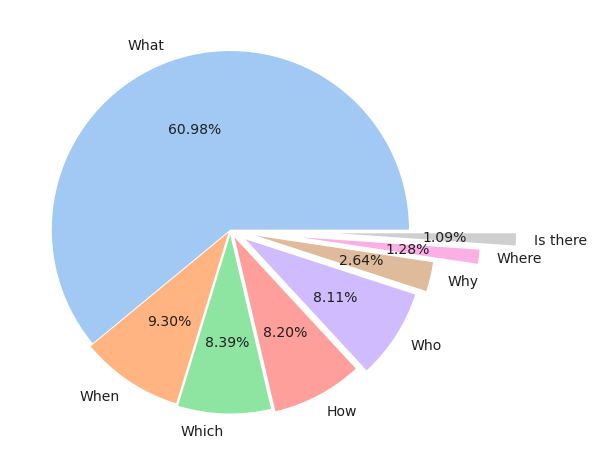

In [48]:
plot_qtype_frequency(df_final, 'cpgQA')

In [49]:
df_title['QID'] = df_title['QID'].apply(str)
df_final['QID'] = df_final['QID'].apply(str)

In [50]:
len(np.unique(df_title['QID'].values))

1097

In [52]:
a = df_final.merge(df_title, how='inner', on='QID')
a

,Question,Question Type,QID,title_old,Answer,TITLE
0,What is the purpose of Opioid Taper Decision T...,What,0,Pain Management Opioid Taper Decision Tool,assist Primary Care providers in determining i...,Specifications
1,What should be done before starting opioid the...,What,1,Pain Management Opioid Taper Decision Tool,Establish treatment goals,Specifications
2,What should be done if an opioid thrapy is dis...,What,2,Pain Management Opioid Taper Decision Tool,plan,Specifications
3,When to continue opioid therapy?,When,3,Pain Management Opioid Taper Decision Tool,if there is clinically meaningful improvement ...,Specifications
4,What to discuss before starting the treatment?,What,4,Pain Management Opioid Taper Decision Tool,"risks, benefits and responsibilities for manag...",Specifications
...,...,...,...,...,...,...
1092,Mention some differences in the methodology us...,What,604,Prioritizing Safe Opioid Prescribing Practices...,"Along with a clinical evidence review, during ...",Background
1093,Should the opioid-naive individuals be prescri...,Is there,402,Module B: Treatment with Opioid Therapy,long-acting opioids should not be prescribed f...,Algorithm
1094,In there any study on the outcome of populatio...,Is there,1017,"Discussion of Recommendations: Type, Dose, Dur...",In a prospective cohort study (not included in...,Recommendations
1095,Define pain according to the VA/DoD CPG.,What,608,Taxonomy,an unpleasant sensory and emotional experience...,Background


In [54]:
a.to_csv('QType_Title.csv', index=False)

In [55]:
aa = pd.read_csv('QType_Title.csv')

In [56]:
all(a == aa)

True

In [57]:
a.TITLE.value_counts()

Recommendations    411
Specifications     280
Background         233
Algorithm          129
Introduction        44
Name: TITLE, dtype: int64

In [58]:
a['Question Type'].value_counts()

What        669
When        102
Which        92
How          90
Who          89
Why          29
Where        14
Is there     12
Name: Question Type, dtype: int64

In [ ]:
# Recommendations    411
# Specifications     280
# Background         233
# Algorithm          129
# Introduction        44

# What        669
# When        102
# Which        92
# How          90
# Who          89
# Why          29
# Where        14
# Is there     12